In [196]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [197]:
synthetic_queries = pd.read_csv('./data/nct_features_sampled.csv')

In [198]:
synthetic_queries.head()

,id,is_asian,is_black,is_native_american,is_pacific_islander,is_white,is_male,is_female,is_hypertension,is_chf,...,is_sodium_chloride,is_glucose,is_potassium,is_docusate,is_heparin,is_magnesium_sulfate,is_acetaminophen,is_pantoprazole,is_metoprolol,is_furosemide
0,NCT00763412,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,NCT01879800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NCT00288132,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NCT00269191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,NCT02785575,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [232]:
def compute_and_plot_occurrence_by_primitive(synthetic_query_df):
    
    num_queries = synthetic_query_df.shape[0]
    
    occurrences_by_primitive = pd.DataFrame(synthetic_queries.iloc[:, 1:].sum(axis=0)).reset_index()
    occurrences_by_primitive.columns = ['primitive', 'occurrence_count']
    occurrences_by_primitive['frequency'] = occurrences_by_primitive['occurrence_count']/num_queries
    occurrences_by_primitive.sort_values(['frequency'], inplace=True, ascending=False)
    
    print(occurrences_by_primitive)
    
    plt.figure(figsize=(12,7))
    plt.barh(occurrences_by_primitive['primitive'],width=occurrences_by_primitive['frequency'], color='#67B2B9')
    plt.title("Relative Occurrence of Each Query Primitive in Synthetic Query Corpus (n={})".format(synthetic_query_df.shape[0]))
    plt.show()
    plt.savefig("./plots/occurrence_counts_by_primitive.png")
    return 


def compute_cooccurrence_matrix(synthetic_query_df):
    cooccur_mat = synthetic_query_df.iloc[:, 1:].T.dot(synthetic_query_df.iloc[:, 1:])
    return cooccur_mat

def plot_comat(cmat):
    plt.figure(figsize=(15,8))
    
    # Get the upper triangle without the diagonal 
    mask = np.zeros_like(cmat, dtype=np.bool)
    mask[np.tril_indices_from(mask)] = True
    
    ax = sns.heatmap(cmat.astype(int), annot=True,  fmt="d", cmap="GnBu", mask=mask,vmax=145)
    plt.title("Co-Occurrence of Query Primitives")
    plt.show()
    plt.savefig("./plots/primitive_cooccurrence.png")
    return




                 primitive  occurrence_count  frequency
7          is_hypertension             325.0      0.325
18              is_glucose             319.0      0.319
6                is_female             259.0      0.259
5                  is_male             220.0      0.220
9                  is_afib              81.0      0.081
8                   is_chf              76.0      0.076
21              is_heparin              47.0      0.047
23        is_acetaminophen              32.0      0.032
11        is_renal_failure              30.0      0.030
10             is_diabetes              29.0      0.029
14                 is_gerd              25.0      0.025
16  is_respiratory_failure              22.0      0.022
4                 is_white              22.0      0.022
12     is_high_cholesterol              21.0      0.021
13                  is_uti              19.0      0.019
26           is_furosemide              10.0      0.010
1                 is_black               5.0    

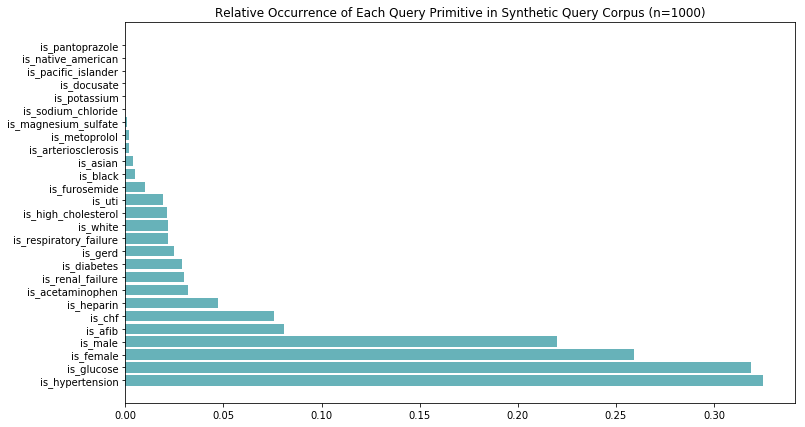

<Figure size 432x288 with 0 Axes>

In [233]:
compute_and_plot_occurrence_by_primitive(synthetic_queries)
corr_mat = compute_cooccurrence_matrix(synthetic_queries)




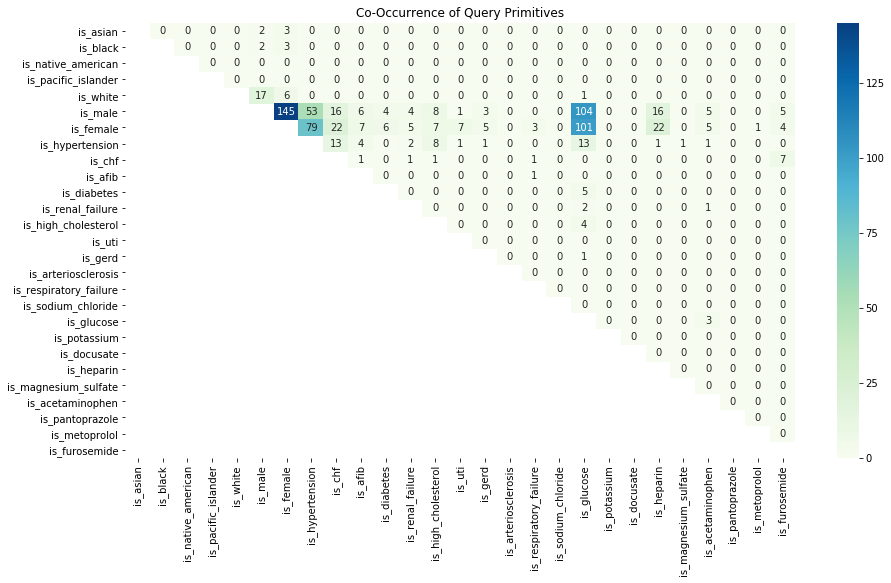

<Figure size 432x288 with 0 Axes>

In [234]:
plot_comat(corr_mat)
